<a href="https://colab.research.google.com/github/JoeyBarlia/Superstore-Analysis/blob/main/Superstore_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns





In [9]:
df = pd.read_csv('SuperStoreOrders.csv')
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [10]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014
51289,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3,3,0.2,-0.6048,0.17,Medium,2014


It seems that at some point, order_date was entered in a different format. dd/mm/yyyy to yyyy-mm-dd. Lets standardize.

In [11]:
df['order_date'] = df['order_date'].astype('datetime64[ns]')
df['ship_date'] = df['ship_date'].astype('datetime64[ns]')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

 'Sales' is numeric and should not be an object.

In [16]:
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

Check for null values

In [17]:
df.isnull().sum()

,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_name,0
segment,0
state,0
country,0
market,0
region,0


In [18]:
df['sales'] = df['sales'].fillna(0)

Does every row correspond to a unique order ID?

In [19]:
df['order_id'].value_counts()

,count
order_id,
CA-2014-100111,14
MX-2014-166541,13
TO-2014-9950,13
NI-2014-8880,13
IN-2013-42311,13
...,...
PL-2013-7560,1
US-2013-144050,1
CA-2013-138933,1


No. Some repeat up to 14 times. Will keep this in mind.

###Feature Engineering

In [20]:
#month column
df['order_month'] = df['order_date'].dt.month

#Naming the months
m={1:"January",2:"Fabruary",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}

df['order_month']=[m[i] for i in df['order_month']]

In [21]:
#profit per sale. We will call it profit rate
df['profit_rate'] = df['profit']/df['sales']

In [22]:
#days to ship aka lead time
df['lead_time'] = df['ship_date'] - df['order_date']
df['lead_time'] = df['lead_time'].dt.days

df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sales,quantity,discount,profit,shipping_cost,order_priority,year,order_month,profit_rate,lead_time
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,408.0,2,0.0,106.140,35.46,Medium,2011,January,0.260147,151
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,120.0,3,0.1,36.036,9.72,Medium,2011,January,0.300300,212
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,66.0,4,0.0,29.640,8.17,High,2011,January,0.449091,120
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,45.0,3,0.5,-26.055,4.82,High,2011,January,-0.579000,120
4,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,114.0,5,0.1,37.770,4.70,Medium,2011,January,0.331316,212


#EDA

**Which is our most profitable category?**

In [23]:
aggregated_df = df.groupby('category', as_index=False)['profit'].sum()

<ipython-input-24-32f6632d78dc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='profit', data=aggregated_df, palette='inferno')


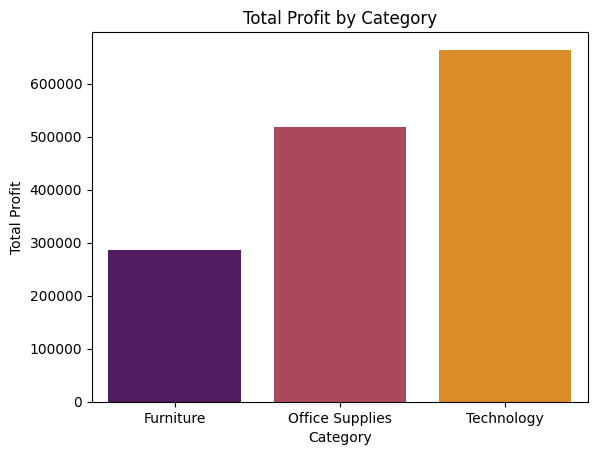

In [24]:
sns.barplot(x='category', y='profit', data=aggregated_df, palette='inferno')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()

Creating the same plot as above but aggregating directly

<ipython-input-25-a598f0f71021>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='profit', data=df, estimator=sum, ci=None, palette='')
<ipython-input-25-a598f0f71021>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='profit', data=df, estimator=sum, ci=None, palette='')


ValueError: '' is not a valid palette name

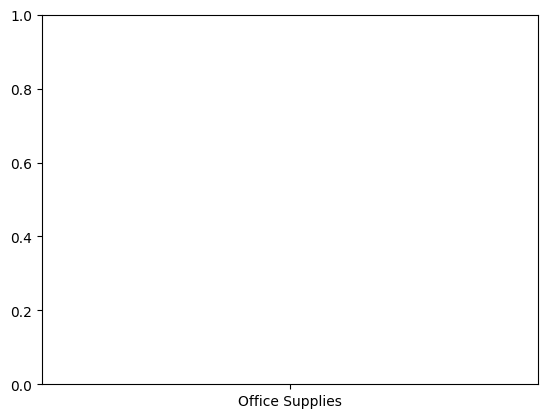

In [25]:
sns.barplot(x='category', y='profit', data=df, estimator=sum, ci=None, palette='')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()

<ipython-input-26-36efa8808b39>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='sales', data=df, estimator=sum, ci=None, palette='coolwarm')
<ipython-input-26-36efa8808b39>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='sales', data=df, estimator=sum, ci=None, palette='coolwarm')


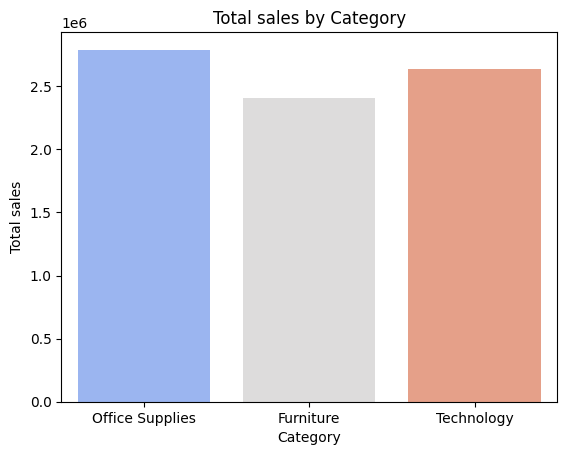

In [26]:
sns.barplot(x='category', y='sales', data=df, estimator=sum, ci=None, palette='coolwarm')
plt.title('Total sales by Category')
plt.xlabel('Category')
plt.ylabel('Total sales')
plt.show()

Office supplies despite having more sales, brings less profit than technology. Makes sense, tech products typically have higher margins.

**Which are our most profitable subcategories?**

<ipython-input-27-e02ba8422fd7>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sub_category', y='sales', data=df, estimator=sum, ci=None, palette='inferno')
<ipython-input-27-e02ba8422fd7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sub_category', y='sales', data=df, estimator=sum, ci=None, palette='inferno')


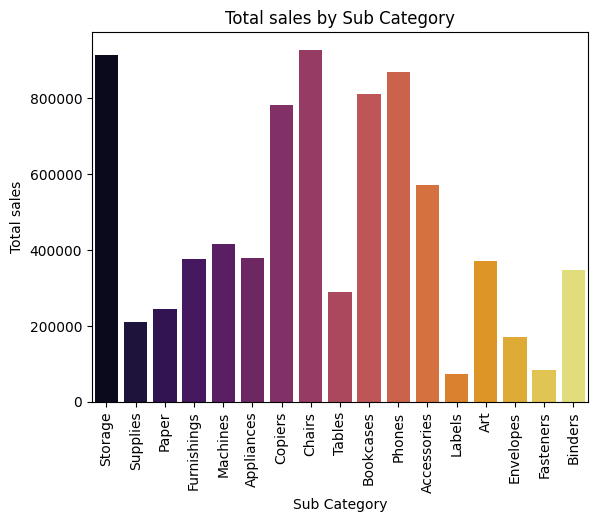

In [27]:
sns.barplot(x='sub_category', y='sales', data=df, estimator=sum, ci=None, palette='inferno')
plt.title('Total sales by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Total sales')
plt.xticks(rotation=90, ha='center')
plt.show()

<ipython-input-28-3ee88e43d0b7>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sub_category', y='profit', data=df, hue='category', estimator=sum, ci=None, palette='autumn')


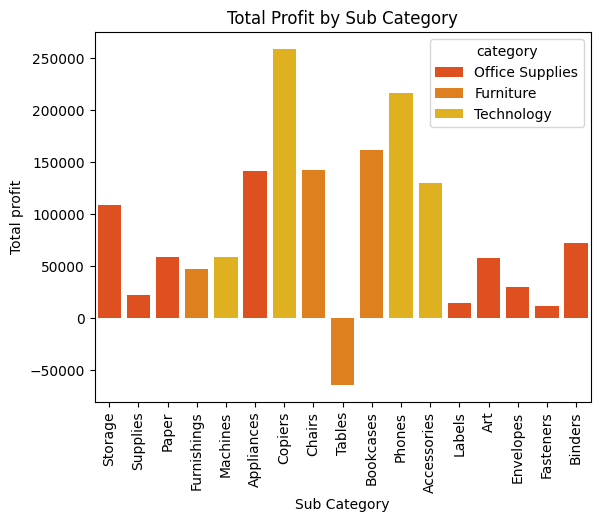

In [28]:
#remove hue?
sns.barplot(x='sub_category', y='profit', data=df, hue='category', estimator=sum, ci=None, palette='autumn')
plt.title('Total Profit by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Total profit')
plt.xticks(rotation=90, ha='center')
plt.show()

Most profitable subcategories are copiers, phones, and bookcases. Least profitable are fasteners, labels, and supplies. Most notably, tables has negative profit.

Sales per market?

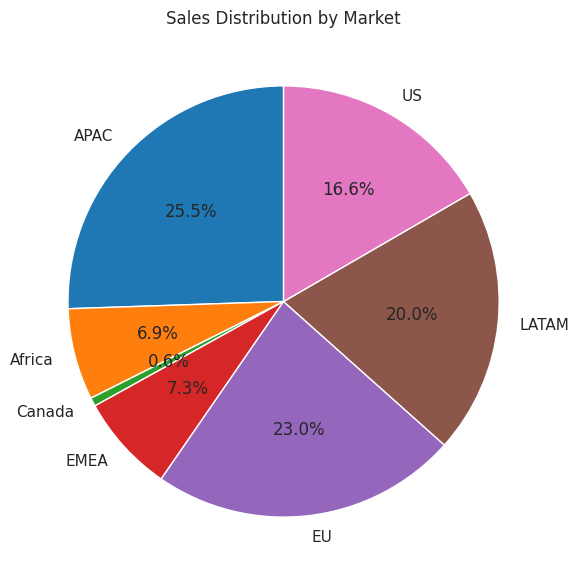

In [43]:
market_sales = df.groupby('market')['sales'].sum()


plt.figure(figsize=(7, 7))
plt.pie(market_sales, labels=market_sales.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
plt.title('Sales Distribution by Market')
plt.show()

Most profitable market?

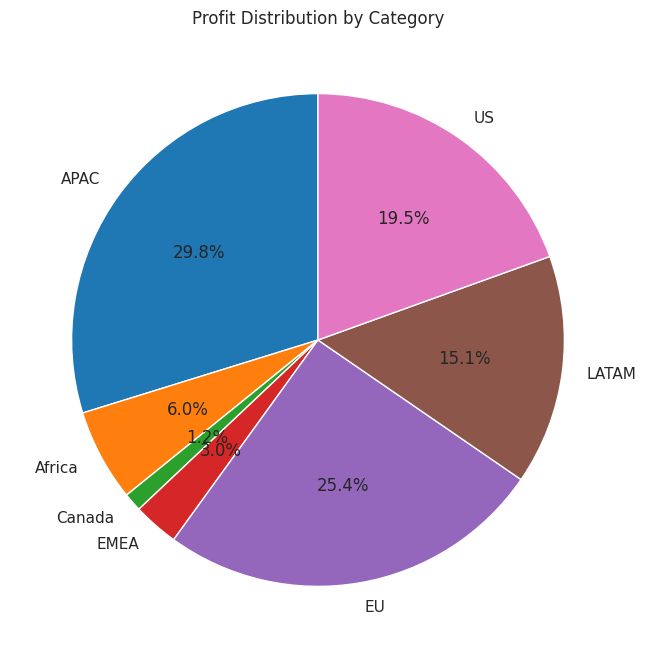

In [47]:
market_profit = df.groupby('market')['profit'].sum()

plt.figure(figsize=(8, 8))
plt.pie(market_profit, labels=market_profit.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
plt.title('Profit Distribution by Category')
plt.show()

No surprises. No difference between sales and profit.

Sales by region?

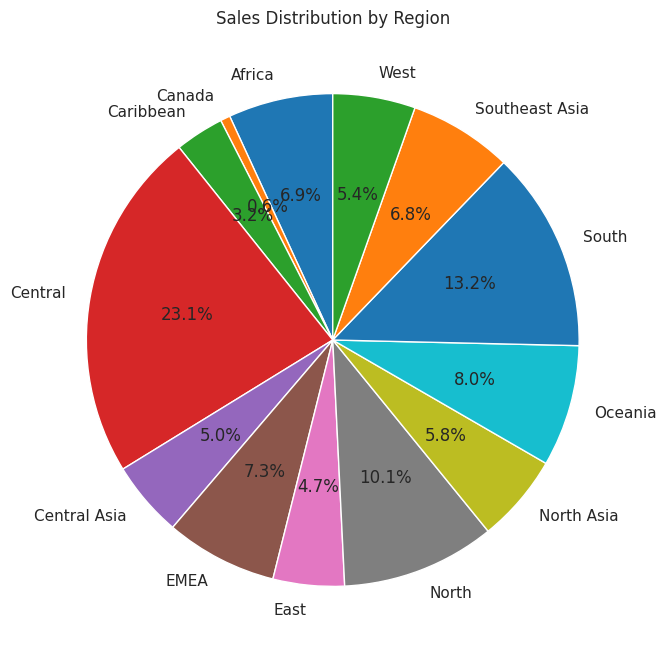

In [49]:
region_sales = df.groupby('region')['sales'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
plt.title('Sales Distribution by Region')
plt.show()

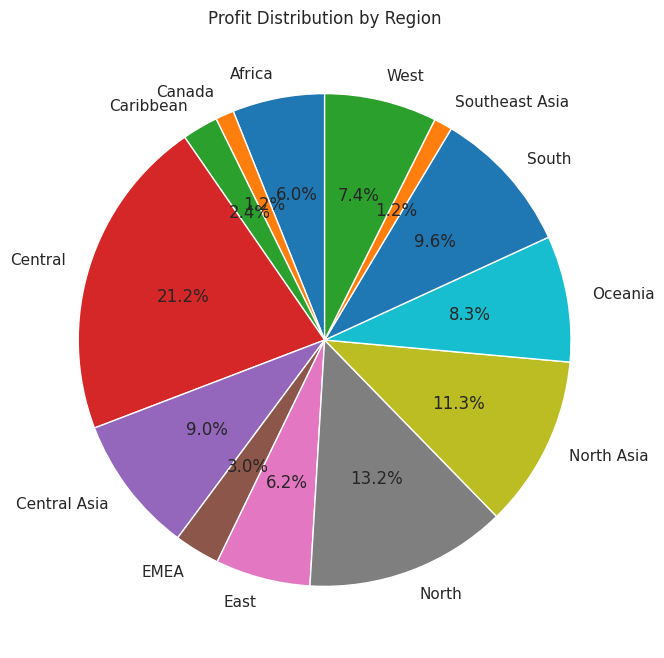

In [50]:
region_profit = df.groupby('region')['profit'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_profit, labels=region_profit.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
plt.title('Profit Distribution by Region')
plt.show()

Proft and sales line up. Southeast asia makes up 1.2 percent of profit but 6.8 percent of sales.

Central, South, East, West, and North are some of the biggest regions. Are these regions in the US?

In [56]:
df[df['region']=='North'].head(10)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sales,quantity,discount,profit,shipping_cost,order_priority,year,order_month,profit_rate,lead_time
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,45.0,3,0.500,-26.05500,4.82,High,2011,January,-0.579000,120
12,ES-2011-4869686,2011-03-01,2011-07-01,Standard Class,Dorothy Dickinson,Consumer,England,United Kingdom,EU,North,...,854.0,7,0.000,290.43000,12.56,Medium,2011,March,0.340082,122
28,MX-2011-140641,2011-04-01,2011-09-01,Standard Class,Maya Herman,Corporate,Yucatán,Mexico,LATAM,North,...,223.0,4,0.000,13.28000,42.28,High,2011,April,0.059552,153
32,MX-2011-140641,2011-04-01,2011-09-01,Standard Class,Maya Herman,Corporate,Yucatán,Mexico,LATAM,North,...,166.0,2,0.002,49.42824,9.54,High,2011,April,0.297760,153
37,IT-2011-2942451,2011-04-01,2011-09-01,Standard Class,Grant Thornton,Corporate,England,United Kingdom,EU,North,...,27.0,2,0.500,-21.90000,2.11,Medium,2011,April,-0.811111,153
40,IT-2011-2942451,2011-04-01,2011-09-01,Standard Class,Grant Thornton,Corporate,England,United Kingdom,EU,North,...,17.0,2,0.500,-1.05000,0.90,Medium,2011,April,-0.061765,153
43,MX-2011-109267,2011-05-01,2011-09-01,Standard Class,Jennifer Halladay,Consumer,Veracruz,Mexico,LATAM,North,...,0.0,8,0.000,999.36000,191.20,Medium,2011,May,inf,123
110,IT-2011-3659171,2011-10-01,2011-01-14,Standard Class,Greg Guthrie,Corporate,England,United Kingdom,EU,North,...,206.0,3,0.500,-41.26500,14.65,Medium,2011,October,-0.200316,-260
112,MX-2011-140697,2011-10-01,2011-01-15,Standard Class,Paul MacIntyre,Consumer,México,Mexico,LATAM,North,...,114.0,3,0.000,56.88000,8.93,Medium,2011,October,0.498947,-259
123,MX-2011-140697,2011-10-01,2011-01-15,Standard Class,Paul MacIntyre,Consumer,México,Mexico,LATAM,North,...,16.0,1,0.000,1.76000,0.89,Medium,2011,October,0.110000,-259


Looks like region corresponds to regions within markets. Not regions within countries since Stockholm is not in the northern region of sweden but sweden is in the northern region of the EU. Likewise Yucatan is not in the north of mexico but mexico is in the north of latin america (LATAM)

Lets look into countries

<ipython-input-57-9dc1087beea5>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='country', y='sales', data=df, estimator=sum, ci=None, palette='inferno')
<ipython-input-57-9dc1087beea5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='sales', data=df, estimator=sum, ci=None, palette='inferno')


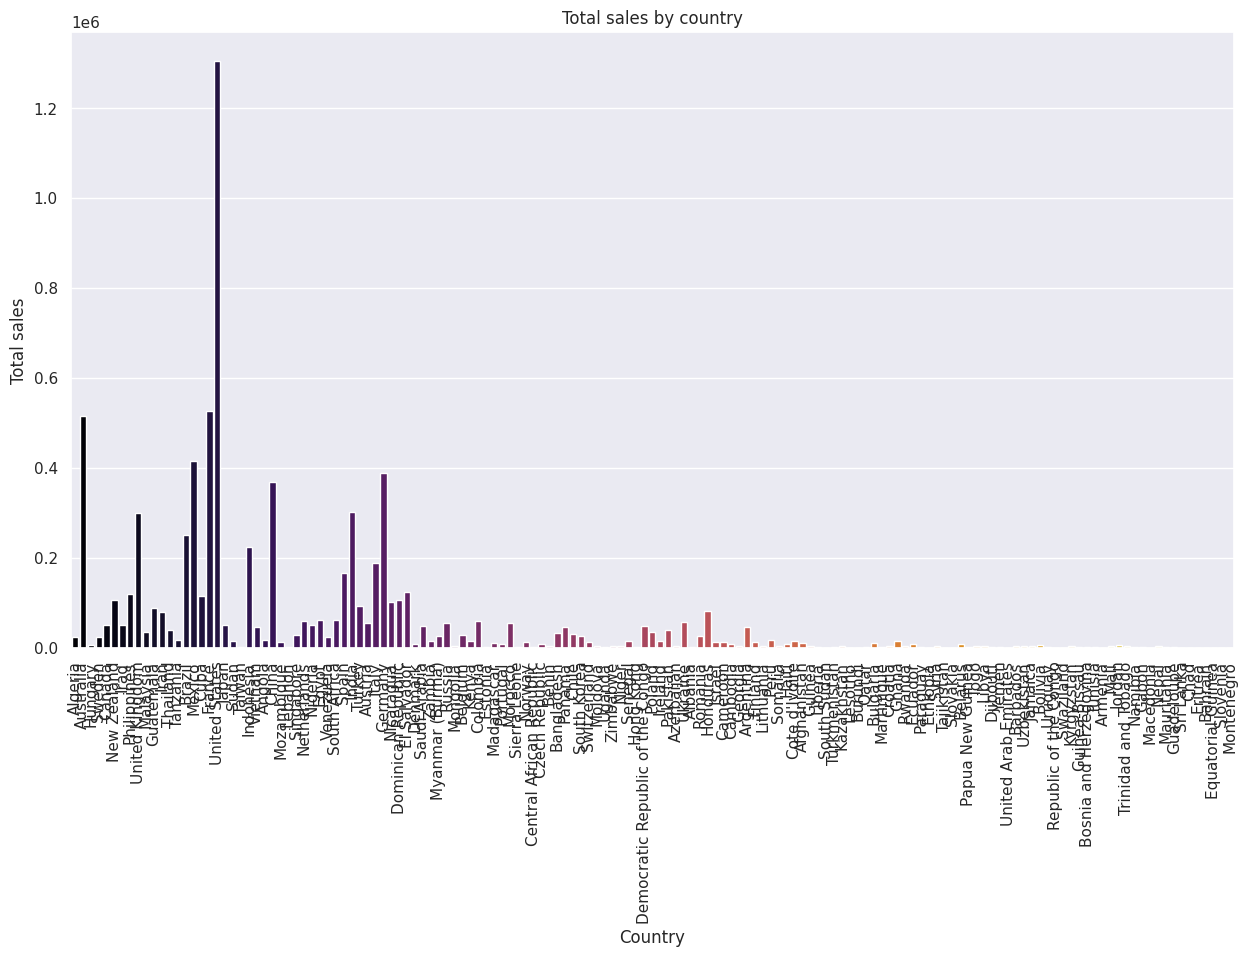

In [57]:
sns.barplot(x='country', y='sales', data=df, estimator=sum, ci=None, palette='inferno')
plt.title('Total sales by country')
plt.xlabel('Country')
plt.ylabel('Total sales')
plt.xticks(rotation=90, ha='center')
plt.show()

Lets do just top 20

<ipython-input-62-3015953df68a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='country', y='sales', data=top_countries, ci=None, palette='summer')
<ipython-input-62-3015953df68a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='sales', data=top_countries, ci=None, palette='summer')


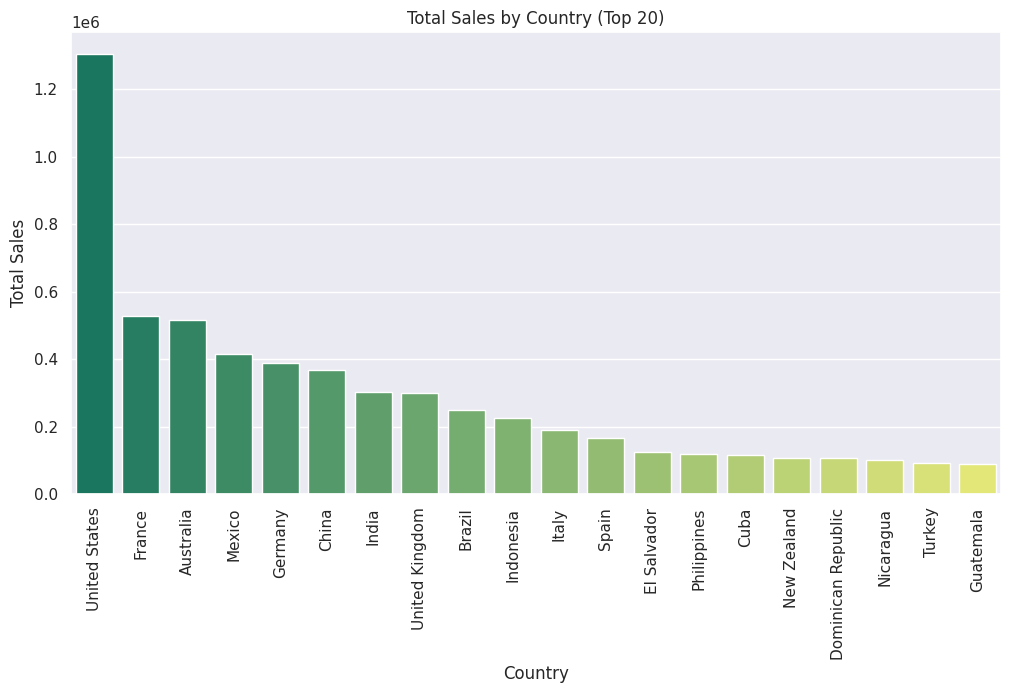

In [62]:
country_sales = df.groupby('country')['sales'].sum().nlargest(20).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='sales', data=top_countries, ci=None, palette='summer')
plt.title('Total Sales by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90, ha='center')
plt.show()

<ipython-input-87-887744b26109>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='country', y='sales', data=top_countries, ci=None, palette='summer')
<ipython-input-87-887744b26109>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='sales', data=top_countries, ci=None, palette='summer')


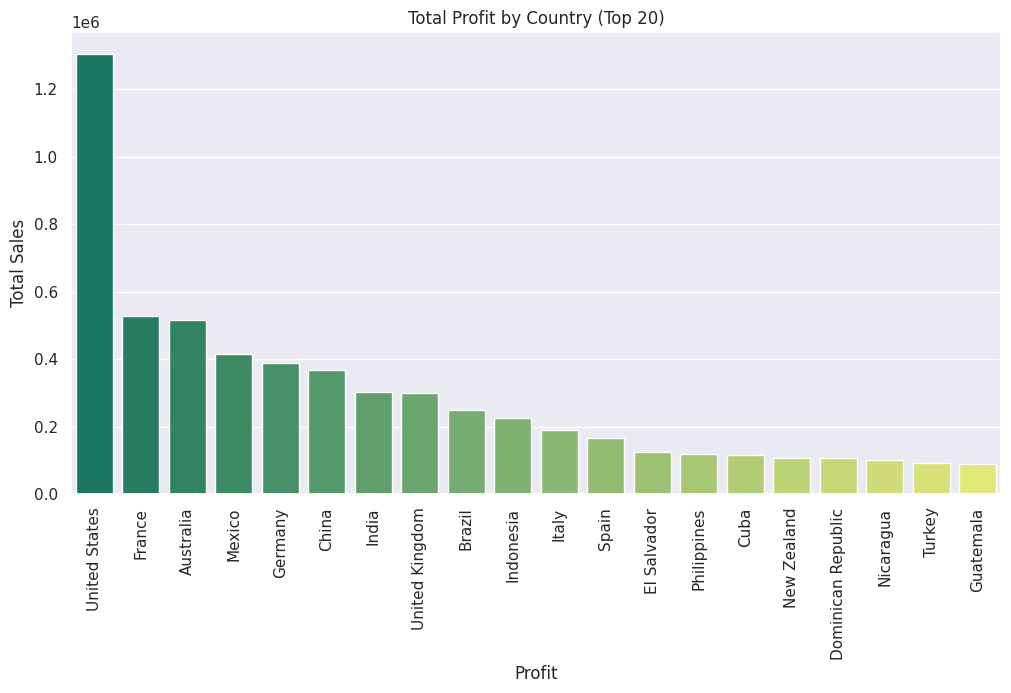

In [87]:
country_profit = df.groupby('country')['profit'].sum().nlargest(20).reset_index()

# Plot the top 20 countries
plt.figure(figsize=(12, 6))  # Adjust figure size
sns.barplot(x='country', y='sales', data=top_countries, ci=None, palette='summer')
plt.title('Total Profit by Country (Top 20)')
plt.xlabel('Profit')
plt.ylabel('Total Sales')
plt.xticks(rotation=90, ha='center')
plt.show()

Lets look into states within the US

<ipython-input-96-b7bf82261231>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='profit', data=state_sales, palette='spring')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'California'),
  Text(1, 0, 'New York'),
  Text(2, 0, 'Washington'),
  Text(3, 0, 'Michigan'),
  Text(4, 0, 'Virginia'),
  Text(5, 0, 'Indiana'),
  Text(6, 0, 'Georgia'),
  Text(7, 0, 'Kentucky'),
  Text(8, 0, 'Minnesota'),
  Text(9, 0, 'Delaware'),
  Text(10, 0, 'New Jersey'),
  Text(11, 0, 'Wisconsin'),
  Text(12, 0, 'Rhode Island'),
  Text(13, 0, 'Maryland'),
  Text(14, 0, 'Massachusetts'),
  Text(15, 0, 'Missouri'),
  Text(16, 0, 'Alabama'),
  Text(17, 0, 'Oklahoma'),
  Text(18, 0, 'Arkansas'),
  Text(19, 0, 'Connecticut')])

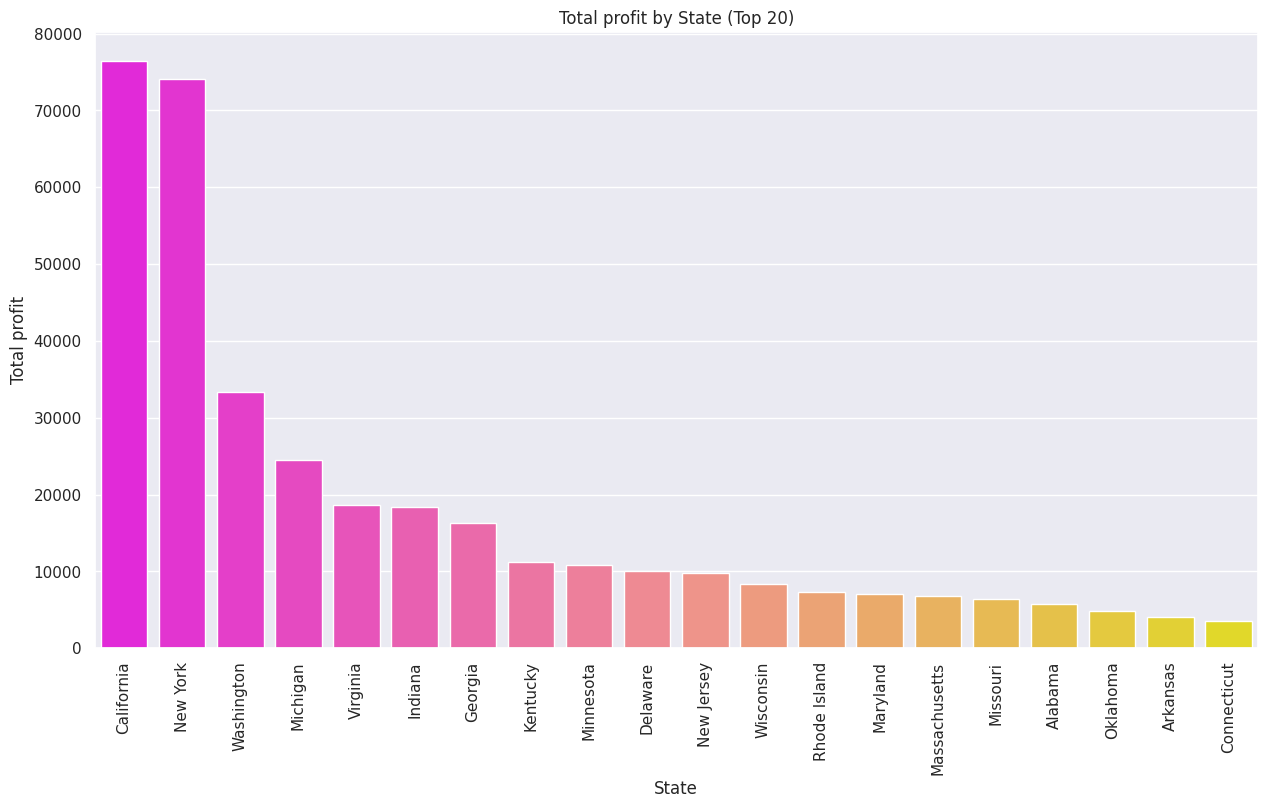

In [96]:
usa_data = df[df['country'] == 'United States']
state_sales = usa_data.groupby('state')['profit'].sum().nlargest(20).reset_index()
sns.barplot(x='state', y='profit', data=state_sales, palette='spring')
plt.title('Total profit by State (Top 20)')
plt.xlabel('State')
plt.ylabel('Total profit')
plt.xticks(rotation=90, ha='center')

<ipython-input-97-bbd08df2b375>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='profit', data=state_sales, palette='spring')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Texas'),
  Text(1, 0, 'Ohio'),
  Text(2, 0, 'Pennsylvania'),
  Text(3, 0, 'Illinois'),
  Text(4, 0, 'North Carolina'),
  Text(5, 0, 'Colorado'),
  Text(6, 0, 'Tennessee'),
  Text(7, 0, 'Arizona'),
  Text(8, 0, 'Florida'),
  Text(9, 0, 'Oregon'),
  Text(10, 0, 'Wyoming'),
  Text(11, 0, 'West Virginia'),
  Text(12, 0, 'North Dakota'),
  Text(13, 0, 'South Dakota'),
  Text(14, 0, 'Maine'),
  Text(15, 0, 'Idaho'),
  Text(16, 0, 'Kansas'),
  Text(17, 0, 'District of Columbia'),
  Text(18, 0, 'New Mexico'),
  Text(19, 0, 'Iowa')])

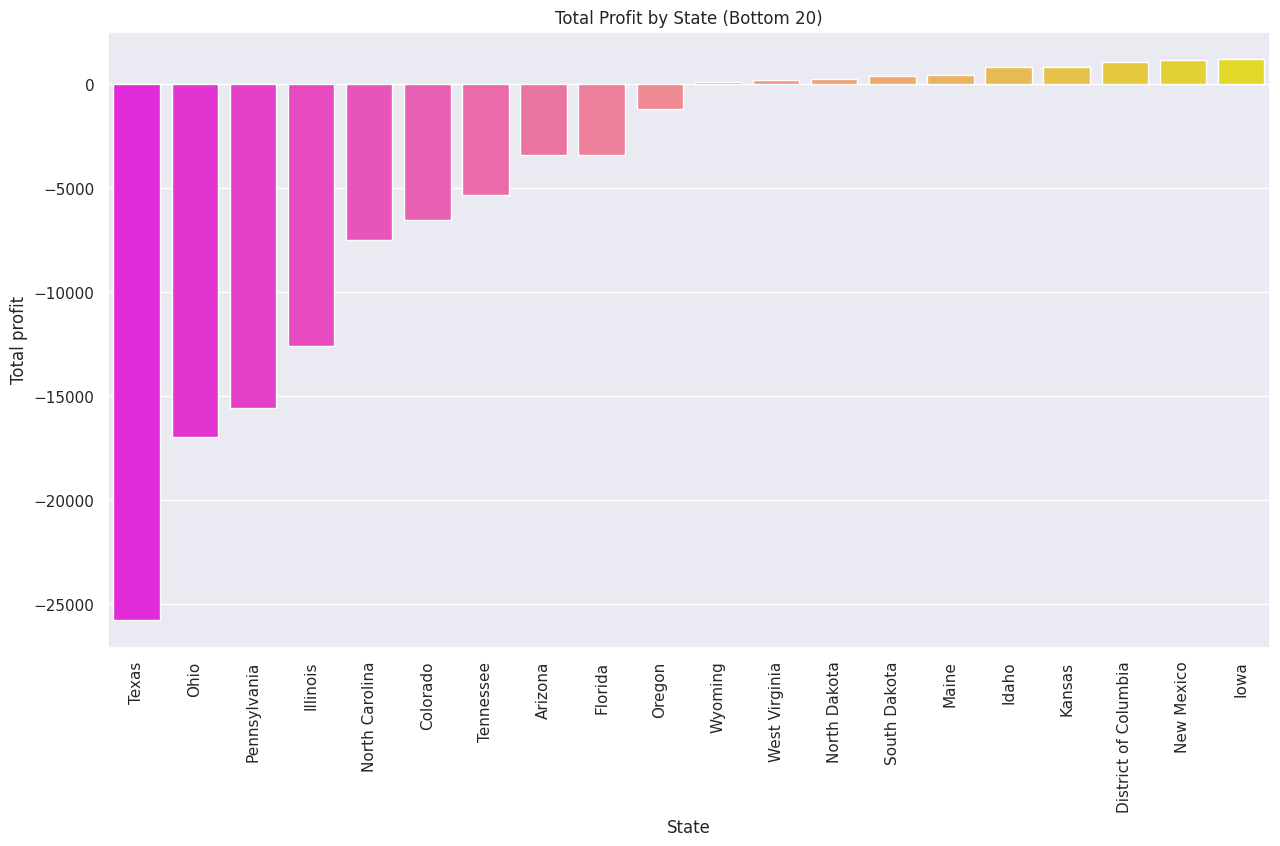

In [97]:
usa_data = df[df['country'] == 'United States']
state_sales = usa_data.groupby('state')['profit'].sum().nsmallest(20).reset_index()
sns.barplot(x='state', y='profit', data=state_sales, palette='spring')
plt.title('Total Profit by State (Bottom 20)')
plt.xlabel('State')
plt.ylabel('Total profit')
plt.xticks(rotation=90, ha='center')

Very surprised that Texas operates at such a big loss

<Axes: xlabel='region', ylabel='count'>

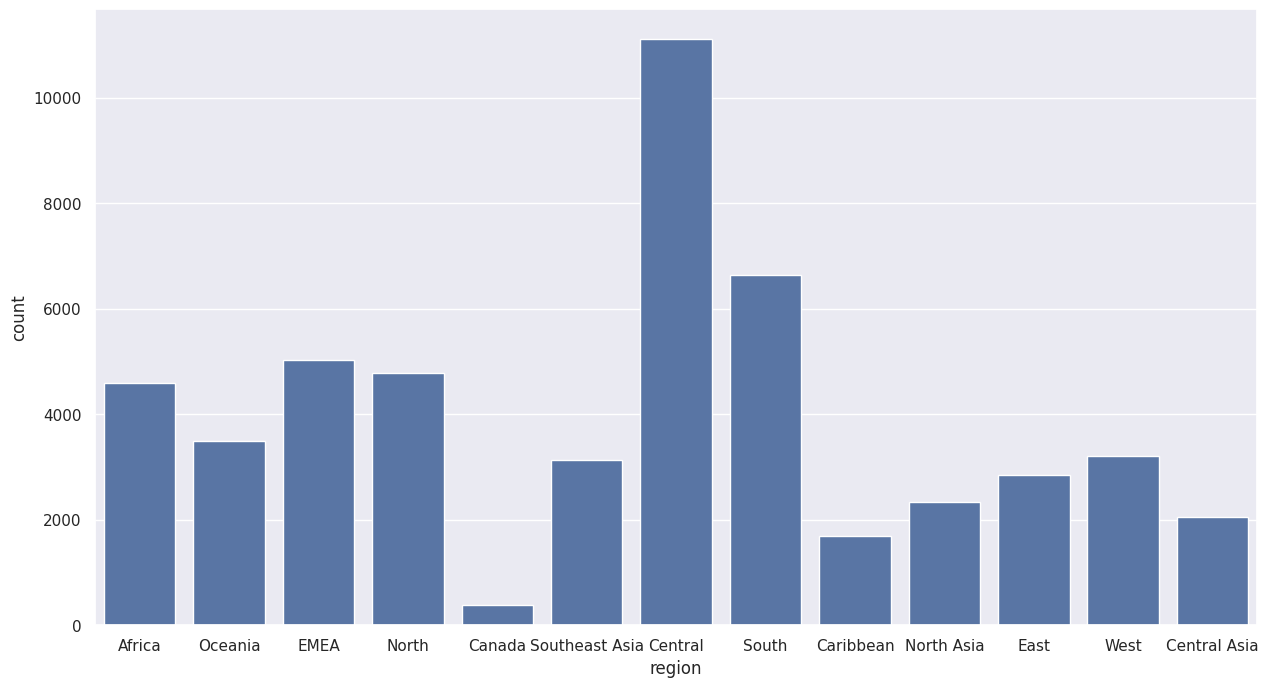

In [99]:
#Experimented with ways of plotting. Why does this cell work?
#does it "count"by default?
sns.set(rc={'figure.figsize':(15, 8)})
sns.countplot(x=df['region'])


**What are our top 10 most popular products?**

In [100]:
top_sp=pd.DataFrame(df.groupby(['product_name']).sum()['quantity'])
top_sp.sort_values('quantity',ascending=False)[:10]

TypeError: datetime64 type does not support sum operations

{Sales might not have been that useful when looking into markets/regions. But it will be much more usefull when looking into products.}

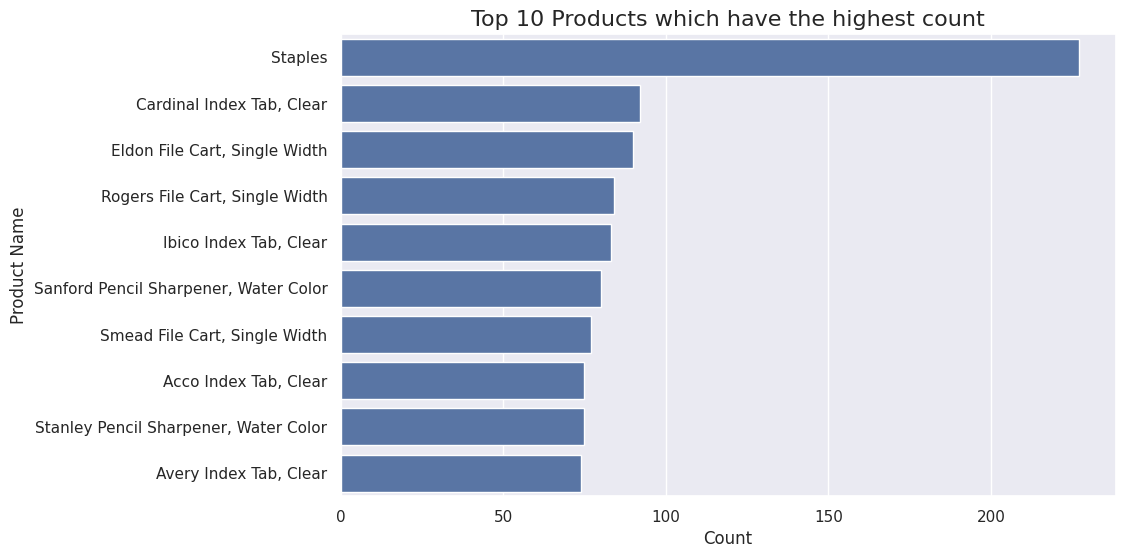

In [101]:

plt.figure(figsize=(10, 6))
sns.countplot(y='product_name', data=df, order=df['product_name'].value_counts().head(10).index)
plt.title('Top 10 Products which have the highest count', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

plt.show()

Breakdown of sales over time

*   Best month
*   Are we growing as a company?




Best customers (by name)